In [14]:
import numpy as np
import random
from keras import models
from keras import layers
from keras.utils import to_categorical
from keras import regularizers
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [4]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [12]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse')
    return model

In [13]:
k=10
num_val_samples = len(train_data) // k
num_epochs = 20
all_mse_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mse_history = history.history['loss']
    all_mse_histories.append(mse_history)
    

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


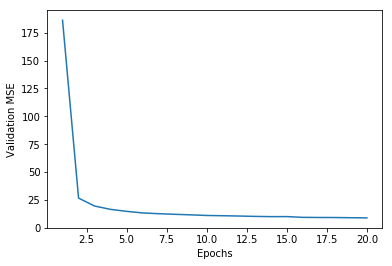

In [15]:
average_mse_history = [
    np.mean([x[i] for x in all_mse_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mse_history) + 1), average_mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

More epochs!

In [16]:
k=10
num_val_samples = len(train_data) // k
num_epochs = 100
all_mse_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mse_history = history.history['loss']
    all_mse_histories.append(mse_history)
    

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


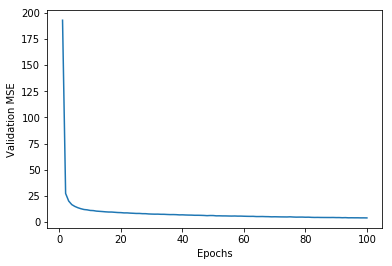

In [17]:
average_mse_history = [
    np.mean([x[i] for x in all_mse_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mse_history) + 1), average_mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

The validation set MSE still seems to be dropping after 100 epochs. I'll try tweaking the model a bit.

In [18]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse')
    return model

In [19]:
k=10
num_val_samples = len(train_data) // k
num_epochs = 100
all_mse_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mse_history = history.history['loss']
    all_mse_histories.append(mse_history)
    

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


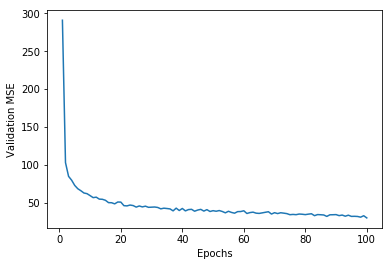

In [20]:
average_mse_history = [
    np.mean([x[i] for x in all_mse_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mse_history) + 1), average_mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

In [27]:
average_mse_history[-1]

30.007427855311704

Not better – will try something else.

In [28]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(30, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(30, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse')
    return model

In [29]:
k=10
num_val_samples = len(train_data) // k
num_epochs = 100
all_mse_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mse_history = history.history['loss']
    all_mse_histories.append(mse_history)
    

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


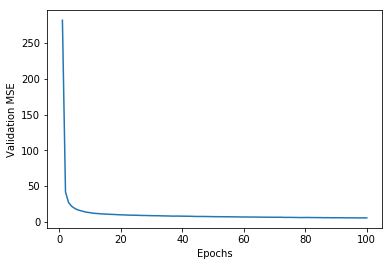

In [30]:
average_mse_history = [
    np.mean([x[i] for x in all_mse_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mse_history) + 1), average_mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

In [31]:
average_mse_history[-1]

5.385101174867114

Looks better!

In [41]:
model = build_model()
history = model.fit(train_data, train_targets, epochs=num_epochs, batch_size=1)

Epoch 1/100
404/404 [==============================] - 2s 5ms/step - loss: 333.0874
Epoch 2/100
404/404 [==============================] - 1s 3ms/step - loss: 42.8200
Epoch 3/100
404/404 [==============================] - 1s 3ms/step - loss: 26.2266
Epoch 4/100
404/404 [==============================] - 1s 3ms/step - loss: 19.8289
Epoch 5/100
404/404 [==============================] - 1s 3ms/step - loss: 17.4243
Epoch 6/100
404/404 [==============================] - 1s 3ms/step - loss: 14.9601
Epoch 7/100
404/404 [==============================] - 1s 3ms/step - loss: 13.5367
Epoch 8/100
404/404 [==============================] - 1s 3ms/step - loss: 12.4167
Epoch 9/100
404/404 [==============================] - 1s 3ms/step - loss: 11.9354
Epoch 10/100
404/404 [==============================] - 1s 3ms/step - loss: 11.6424
Epoch 11/100
404/404 [==============================] - 1s 3ms/step - loss: 10.8918
Epoch 12/100
404/404 [==============================] - 1s 3ms/step - loss: 10.3753


404/404 [==============================] - 1s 3ms/step - loss: 5.2474
Epoch 100/100
404/404 [==============================] - 1s 3ms/step - loss: 5.0157


In [42]:
test_mse_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 4ms/step


In [43]:
test_mse_score

15.18050833309398